In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('C:/Users/USER/Downloads/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
a=df.iloc[np.where(df['Glucose']>125)]
a.iloc[np.where(a['Outcome']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80,0,0,27.1,1.441,57,0
20,3,126,88,41,235,39.3,0.704,27,0
28,13,145,82,19,110,22.2,0.245,57,0
36,11,138,76,0,0,33.2,0.420,35,0
40,3,180,64,25,70,34.0,0.271,26,0
...,...,...,...,...,...,...,...,...,...
727,0,141,84,26,0,32.4,0.433,22,0
728,2,175,88,0,0,22.9,0.326,22,0
736,0,126,86,27,120,27.4,0.515,21,0
744,13,153,88,37,140,40.6,1.174,39,0


In [8]:
c=df.iloc[np.where(df['Age']>40)]
c['Outcome'].value_counts()

1    102
0     92
Name: Outcome, dtype: int64

In [9]:
q=df.groupby(df['Pregnancies'])['Age'].agg(['max'])
q.sort_values(by='Pregnancies',ascending=False)

,max
Pregnancies,
17,47
15,43
14,46
13,57
12,62
11,51
10,63
9,81
8,68


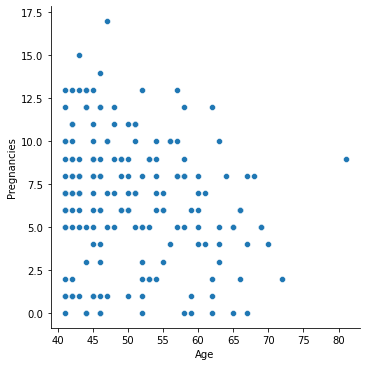

In [10]:
sns.relplot(x='Age',y='Pregnancies',data=c)

In [11]:
df.groupby(df['BMI'])['SkinThickness'].max()

BMI
0.0     23
18.2    19
18.4     0
19.1     0
19.3    11
        ..
53.2    56
55.0    42
57.3    35
59.4    63
67.1    46
Name: SkinThickness, Length: 248, dtype: int64

In [12]:
x=df.iloc[np.where((df['SkinThickness']>40)&(df['Outcome']==1))]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
16,0,118,84,47,230,45.8,0.551,31,1
38,2,90,68,42,0,38.2,0.503,27,1
39,4,111,72,47,207,37.1,1.390,56,1
99,1,122,90,51,220,49.7,0.325,31,1
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
155,7,152,88,44,0,50.0,0.337,36,1
159,17,163,72,41,114,40.9,0.817,47,1
175,8,179,72,42,130,32.7,0.719,36,1


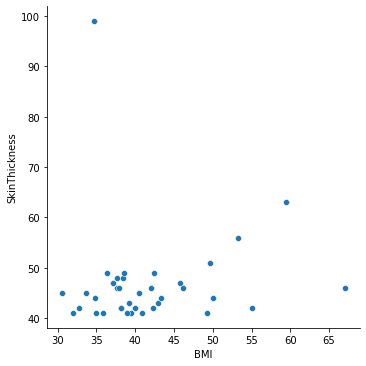

In [13]:
sns.relplot(kind='scatter',x='BMI',y='SkinThickness',data=x)

In [14]:
z=df.groupby(df['Age'])['Outcome'].min()
z.value_counts()

0    51
1     1
Name: Outcome, dtype: int64

In [15]:
g=df.iloc[np.where(df['Age']<23)]
g.iloc[np.where(g['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
220,0,177,60,29,478,34.6,1.072,21,1
230,4,142,86,0,0,44.0,0.645,22,1
242,3,139,54,0,0,25.6,0.402,22,1
255,1,113,64,35,0,33.6,0.543,21,1
397,0,131,66,40,0,34.3,0.196,22,1
414,0,138,60,35,167,34.6,0.534,21,1
415,3,173,84,33,474,35.7,0.258,22,1
448,0,104,64,37,64,33.6,0.510,22,1
577,2,118,80,0,0,42.9,0.693,21,1
580,0,151,90,46,0,42.1,0.371,21,1


In [16]:
b=df.iloc[np.where(df['Outcome']==1)]
b['Age'].min()      #lady with minimum age to have diabetes

21

In [17]:
x=df['Pregnancies'].max()
x

17

In [18]:
df.iloc[np.where(df['Pregnancies']==17)]   #info of a lady with maximum Pregnancies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [19]:
df['BloodPressure'].max()

122

In [20]:
z=df.iloc[np.where(df['BloodPressure']<80)]
z      #low blood presure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df['BloodPressure'].min()

0

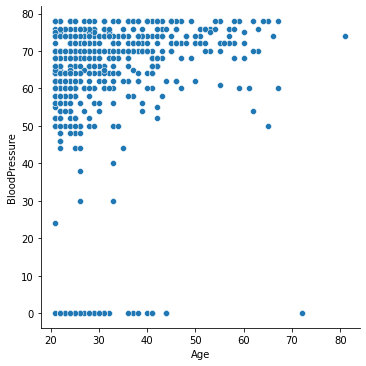

In [22]:
sns.relplot(x='Age',y='BloodPressure',data=z)  #ladies with low blood pressure

In [23]:
b=df.iloc[np.where(df['BloodPressure']>120)]   #with high blood pressure and no diabetes
b

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0


In [24]:
m=df.iloc[np.where((df['BloodPressure']>=80)&(df['BloodPressure']<=120)&(df['Outcome']==1))]   
m             #ladies with normal blood pressure with diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
16,0,118,84,47,230,45.8,0.551,31,1
22,7,196,90,0,0,39.8,0.451,41,1
23,9,119,80,35,0,29.0,0.263,29,1
24,11,143,94,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
743,9,140,94,0,0,32.7,0.734,45,1
746,1,147,94,41,0,49.3,0.358,27,1
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1


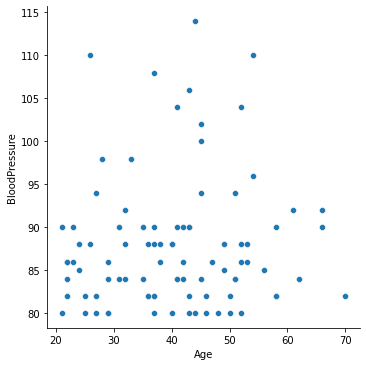

In [25]:
sns.relplot(x='Age',y='BloodPressure',data=m)    #normal bp  with diabetes

In [26]:
n=df.iloc[np.where((df['BloodPressure']>=80)&(df['BloodPressure']<=120)&(df['Outcome']==0))]   
n             #ladies with normal blood pressure with no diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
20,3,126,88,41,235,39.3,0.704,27,0
21,8,99,84,0,0,35.4,0.388,50,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
728,2,175,88,0,0,22.9,0.326,22,0
736,0,126,86,27,120,27.4,0.515,21,0
744,13,153,88,37,140,40.6,1.174,39,0
745,12,100,84,33,105,30.0,0.488,46,0


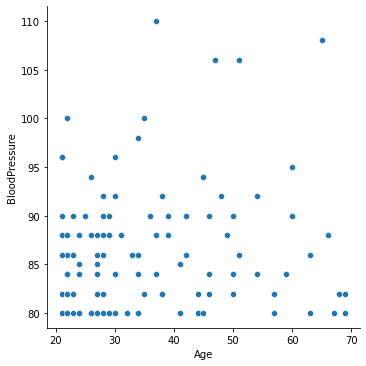

In [27]:
sns.relplot(x='Age',y='BloodPressure',data=n)    #normal bp  with no diabetes

In [28]:
def w(x):
    if x<18.5:
        return "UnderWeight"
    elif x>=18.5 and x<=24.9:
        return "NormalWeight"
    elif x>=25 and x<=29.9:
        return "OverWeight"
    else:
        return "Obese"
df['WeightKind']=df['BMI'].apply(w)

In [29]:
df['WeightKind'].value_counts()

Obese           472
OverWeight      179
NormalWeight    102
UnderWeight      15
Name: WeightKind, dtype: int64

In [30]:
df.groupby(df['WeightKind'])['Outcome'].value_counts()

WeightKind    Outcome
NormalWeight  0           95
              1            7
Obese         0          253
              1          219
OverWeight    0          139
              1           40
UnderWeight   0           13
              1            2
Name: Outcome, dtype: int64

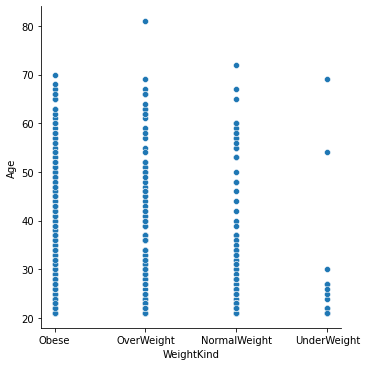

In [31]:
sns.relplot(x='WeightKind',y='Age',data=df)

### Note- 1. ladies with weightType 'Obese' and 'OverWeight' need to start working out
### 2. ladies of Age between 20 to 40 need to concern about their 'BloodPressure'
### 3. All ladies who are diabetes pateint need to be on a proper regular 'Diet' 

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

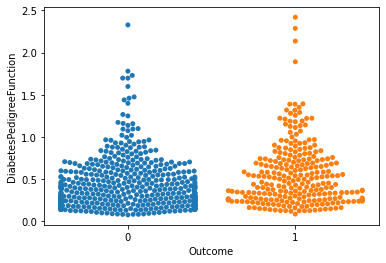

In [32]:
sns.swarmplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)

In [33]:
df.iloc[np.where((df['WeightKind']=='Obese')&(df['Outcome']==1))]   #ladies with diabetes 
                                                                #and weightkind obese

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
0,6,148,72,35,0,33.6,0.627,50,1,Obese
4,0,137,40,35,168,43.1,2.288,33,1,Obese
6,3,78,50,32,88,31.0,0.248,26,1,Obese
8,2,197,70,45,543,30.5,0.158,53,1,Obese
11,10,168,74,0,0,38.0,0.537,34,1,Obese
...,...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1,Obese
757,0,123,72,0,0,36.3,0.258,52,1,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese
761,9,170,74,31,0,44.0,0.403,43,1,Obese


In [34]:
df.iloc[np.where((df['WeightKind']=='OverWeight')&(df['Outcome']==1))]   #ladies with diabetes 
                                                                          #and having overweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
14,5,166,72,19,175,25.8,0.587,51,1,OverWeight
17,7,107,74,0,0,29.6,0.254,31,1,OverWeight
23,9,119,80,35,0,29.0,0.263,29,1,OverWeight
129,0,105,84,0,0,27.9,0.741,62,1,OverWeight
130,4,173,70,14,168,29.7,0.361,33,1,OverWeight
165,6,104,74,18,156,29.9,0.722,41,1,OverWeight
188,8,109,76,39,114,27.9,0.640,31,1,OverWeight
218,5,85,74,22,0,29.0,1.224,32,1,OverWeight
242,3,139,54,0,0,25.6,0.402,22,1,OverWeight
243,6,119,50,22,176,27.1,1.318,33,1,OverWeight


In [35]:
df.iloc[np.where((df['WeightKind']=='NormalWeight')&(df['Outcome']==1))]   #ladies with diabetes 
                                                                          #and having Normalweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
93,4,134,72,0,0,23.8,0.277,60,1,NormalWeight
197,3,107,62,13,48,22.9,0.678,23,1,NormalWeight
319,6,194,78,0,0,23.5,0.129,59,1,NormalWeight
646,1,167,74,17,144,23.4,0.447,33,1,NormalWeight
676,9,156,86,0,0,24.8,0.230,53,1,NormalWeight
749,6,162,62,0,0,24.3,0.178,50,1,NormalWeight


In [36]:
df.iloc[np.where((df['WeightKind']=='UnderWeight')&(df['Outcome']==1))]   #ladies with diabetes 
                                                                          #and having underweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
9,8,125,96,0,0,0.0,0.232,54,1,UnderWeight
706,10,115,0,0,0,0.0,0.261,30,1,UnderWeight


In [37]:
df.iloc[np.where((df['WeightKind']=='Obese')&(df['Outcome']==0))]  #ladies with no diabetes 
                                                            #and having weightkind obese

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
7,10,115,0,0,0,35.3,0.134,29,0,Obese
10,4,110,92,0,0,37.6,0.191,30,0,Obese
18,1,103,30,38,83,43.3,0.183,33,0,Obese
20,3,126,88,41,235,39.3,0.704,27,0,Obese
21,8,99,84,0,0,35.4,0.388,50,0,Obese
...,...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0,Obese
758,1,106,76,0,0,37.5,0.197,26,0,Obese
763,10,101,76,48,180,32.9,0.171,63,0,Obese
764,2,122,70,27,0,36.8,0.340,27,0,Obese


In [38]:
df.iloc[np.where((df['WeightKind']=='OverWeight')&(df['Outcome']==0))] #ladies with no diabetes 
                                                                        #and having overweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
3,1,89,66,23,94,28.1,0.167,21,0,OverWeight
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
12,10,139,80,0,0,27.1,1.441,57,0,OverWeight
34,10,122,78,31,0,27.6,0.512,45,0,OverWeight
...,...,...,...,...,...,...,...,...,...,...
736,0,126,86,27,120,27.4,0.515,21,0,OverWeight
742,1,109,58,18,116,28.5,0.219,22,0,OverWeight
752,3,108,62,24,0,26.0,0.223,25,0,OverWeight
760,2,88,58,26,16,28.4,0.766,22,0,OverWeight


In [39]:
df.iloc[np.where((df['WeightKind']=='NormalWeight')&(df['Outcome']==0))] #ladies with no diabetes 
                                                                        #and having Normalweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
27,1,97,66,15,140,23.2,0.487,22,0,NormalWeight
28,13,145,82,19,110,22.2,0.245,57,0,NormalWeight
32,3,88,58,11,54,24.8,0.267,22,0,NormalWeight
33,6,92,92,0,0,19.9,0.188,28,0,NormalWeight
35,4,103,60,33,192,24.0,0.966,33,0,NormalWeight
...,...,...,...,...,...,...,...,...,...,...
694,2,90,60,0,0,23.5,0.191,25,0,NormalWeight
717,10,94,72,18,0,23.1,0.595,56,0,NormalWeight
728,2,175,88,0,0,22.9,0.326,22,0,NormalWeight
734,2,105,75,0,0,23.3,0.560,53,0,NormalWeight


In [40]:
df.iloc[np.where((df['WeightKind']=='UnderWeight')&(df['Outcome']==0))] #ladies with no diabetes 
                                                                        #and having underweight

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
49,7,105,0,0,0,0.0,0.305,24,0,UnderWeight
60,2,84,0,0,0,0.0,0.304,21,0,UnderWeight
81,2,74,0,0,0,0.0,0.102,22,0,UnderWeight
145,0,102,75,23,0,0.0,0.572,21,0,UnderWeight
239,0,104,76,0,0,18.4,0.582,27,0,UnderWeight
371,0,118,64,23,89,0.0,1.731,21,0,UnderWeight
418,1,83,68,0,0,18.2,0.624,27,0,UnderWeight
426,0,94,0,0,0,0.0,0.256,25,0,UnderWeight
438,1,97,70,15,0,18.2,0.147,21,0,UnderWeight
494,3,80,0,0,0,0.0,0.174,22,0,UnderWeight


In [43]:
z=df.iloc[np.where((df['Age']<30)&(df['Outcome']==1))]
z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
6,3,78,50,32,88,31.0,0.248,26,1,Obese
23,9,119,80,35,0,29.0,0.263,29,1,OverWeight
31,3,158,76,36,245,31.6,0.851,28,1,Obese
38,2,90,68,42,0,38.2,0.503,27,1,Obese
45,0,180,66,39,0,42.0,1.893,25,1,Obese
...,...,...,...,...,...,...,...,...,...,...
731,8,120,86,0,0,28.4,0.259,22,1,OverWeight
732,2,174,88,37,120,44.5,0.646,24,1,Obese
746,1,147,94,41,0,49.3,0.358,27,1,Obese
750,4,136,70,0,0,31.2,1.182,22,1,Obese


In [44]:
df.iloc[np.where((df['Glucose']>140)&(df['Outcome']==0))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
28,13,145,82,19,110,22.2,0.245,57,0,NormalWeight
40,3,180,64,25,70,34.0,0.271,26,0,Obese
44,7,159,64,0,0,27.4,0.294,40,0,OverWeight
46,1,146,56,0,0,29.7,0.564,29,0,OverWeight
54,7,150,66,42,342,34.7,0.718,42,0,Obese
58,0,146,82,0,0,40.5,1.781,44,0,Obese
63,2,141,58,34,128,25.4,0.699,24,0,OverWeight
69,4,146,85,27,100,28.9,0.189,27,0,OverWeight
94,2,142,82,18,64,24.7,0.761,21,0,NormalWeight
95,6,144,72,27,228,33.9,0.255,40,0,Obese


In [45]:
df.iloc[np.where((df['Insulin']==0)&(df['Outcome']==0))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
7,10,115,0,0,0,35.3,0.134,29,0,Obese
10,4,110,92,0,0,37.6,0.191,30,0,Obese
12,10,139,80,0,0,27.1,1.441,57,0,OverWeight
...,...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0,Obese
758,1,106,76,0,0,37.5,0.197,26,0,Obese
762,9,89,62,0,0,22.5,0.142,33,0,NormalWeight
764,2,122,70,27,0,36.8,0.340,27,0,Obese


In [46]:
f=df.iloc[np.where((df['Insulin']>400)&(df['Outcome']==1))]   #these all ladies are suffering from 
f                                                            #diabetes type 2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
8,2,197,70,45,543,30.5,0.158,53,1,Obese
13,1,189,60,23,846,30.1,0.398,59,1,Obese
111,8,155,62,26,495,34.0,0.543,46,1,Obese
186,8,181,68,36,495,30.1,0.615,60,1,Obese
220,0,177,60,29,478,34.6,1.072,21,1,Obese
370,3,173,82,48,465,38.4,2.137,25,1,Obese
409,1,172,68,49,579,42.4,0.702,28,1,Obese
415,3,173,84,33,474,35.7,0.258,22,1,Obese
584,8,124,76,24,600,28.7,0.687,52,1,OverWeight
655,2,155,52,27,540,38.7,0.240,25,1,Obese


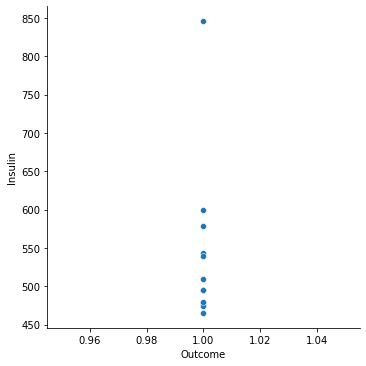

In [47]:
sns.relplot(x='Outcome',y='Insulin',data=f)

In [48]:
n=df.iloc[np.where((df['Insulin']<=400)&(df['Insulin']>100)&(df['Outcome']==1))] #these all ladies 
n                                                                            #are suffering from 
                                                                            #diabetes type 2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
4,0,137,40,35,168,43.1,2.288,33,1,Obese
14,5,166,72,19,175,25.8,0.587,51,1,OverWeight
16,0,118,84,47,230,45.8,0.551,31,1,Obese
24,11,143,94,33,146,36.6,0.254,51,1,Obese
25,10,125,70,26,115,31.1,0.205,41,1,Obese
...,...,...,...,...,...,...,...,...,...,...
722,1,149,68,29,127,29.3,0.349,42,1,OverWeight
732,2,174,88,37,120,44.5,0.646,24,1,Obese
740,11,120,80,37,150,42.3,0.785,48,1,Obese
748,3,187,70,22,200,36.4,0.408,36,1,Obese


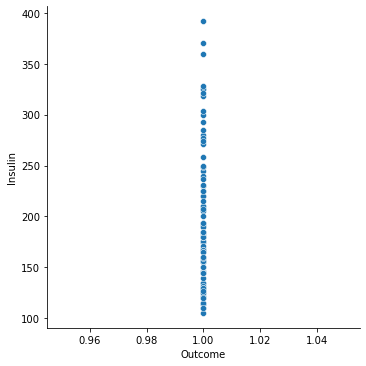

In [49]:
sns.relplot(x='Outcome',y='Insulin',data=n)     #type2 diabetes pateints

#### Insulin is high in type 2 diabetes which body does not accept from body and from outsie as well

In [50]:
k=df.iloc[np.where((df['Insulin']==0)&(df['Insulin']<=100)&(df['Outcome']==1))]
k       #these are patients of diabetes type 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
0,6,148,72,35,0,33.6,0.627,50,1,Obese
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
9,8,125,96,0,0,0.0,0.232,54,1,UnderWeight
11,10,168,74,0,0,38.0,0.537,34,1,Obese
15,7,100,0,0,0,30.0,0.484,32,1,Obese
...,...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1,Obese
757,0,123,72,0,0,36.3,0.258,52,1,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese
761,9,170,74,31,0,44.0,0.403,43,1,Obese


#### In diabetes type 1 body makes little or no insulin at all.so if there is not enough insulin in our body then glucose can get into our cells.it stays in the bloodstream instead which can cause Hyperglycemia

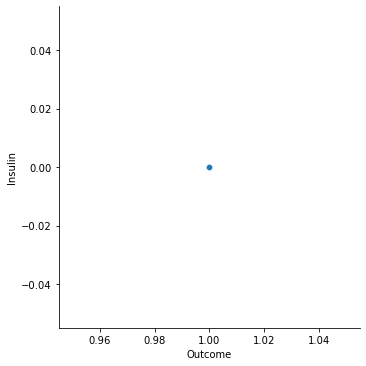

In [51]:
sns.relplot(x='Outcome',y='Insulin',data=k)

In [52]:
df.iloc[np.where((df['Insulin']==0)&(df['Outcome']==0))] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
1,1,85,66,29,0,26.6,0.351,31,0,OverWeight
5,5,116,74,0,0,25.6,0.201,30,0,OverWeight
7,10,115,0,0,0,35.3,0.134,29,0,Obese
10,4,110,92,0,0,37.6,0.191,30,0,Obese
12,10,139,80,0,0,27.1,1.441,57,0,OverWeight
...,...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0,Obese
758,1,106,76,0,0,37.5,0.197,26,0,Obese
762,9,89,62,0,0,22.5,0.142,33,0,NormalWeight
764,2,122,70,27,0,36.8,0.340,27,0,Obese


#### This is cannot be possible because insulin of a normal person cannot be 0

In [53]:
df.iloc[np.where((df['Glucose']>=140)&(df['Insulin']<100))]   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
0,6,148,72,35,0,33.6,0.627,50,1,Obese
2,8,183,64,0,0,23.3,0.672,32,1,NormalWeight
11,10,168,74,0,0,38.0,0.537,34,1,Obese
22,7,196,90,0,0,39.8,0.451,41,1,Obese
26,7,147,76,0,0,39.4,0.257,43,1,Obese
...,...,...,...,...,...,...,...,...,...,...
746,1,147,94,41,0,49.3,0.358,27,1,Obese
749,6,162,62,0,0,24.3,0.178,50,1,NormalWeight
754,8,154,78,32,0,32.4,0.443,45,1,Obese
759,6,190,92,0,0,35.5,0.278,66,1,Obese


#### These are suffering from Hyperglycemia because there glucose level is high and insulin level is low

In [54]:
df.iloc[np.where((df['Glucose']>=140)&(df['Insulin']>200)&(df['Outcome']==0))]   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,WeightKind
54,7,150,66,42,342,34.7,0.718,42,0,Obese
95,6,144,72,27,228,33.9,0.255,40,0,Obese
144,4,154,62,31,284,32.8,0.237,23,0,Obese
153,1,153,82,42,485,40.6,0.687,23,0,Obese
228,4,197,70,39,744,36.7,2.329,31,0,Obese
247,0,165,90,33,680,52.3,0.427,23,0,Obese
258,1,193,50,16,375,25.9,0.655,24,0,OverWeight
286,5,155,84,44,545,38.7,0.619,34,0,Obese
335,0,165,76,43,255,47.9,0.259,26,0,Obese
364,4,147,74,25,293,34.9,0.385,30,0,Obese


#### These are at border of type2 diabetes and cardiovascular diseases because there glucose level and insulin level both are high

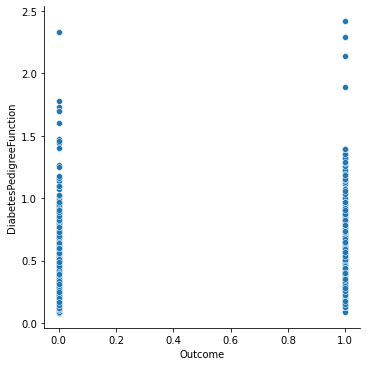

In [55]:
sns.relplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)   

### In this dataset "Glucose" column is not defining us about the glucose level before meal test value or is it after meal test value
### column "Insulin" with value 0 and column "outcome" with value 0 cannot not possible because without insulin a person cannot be normal it only happens when a person is suffering from diabetes type 1
### In this dataset "Insulin" column is not defining us about the insuline level is that Fasting reading or 30 minutes or 1 hour after glucose readings etc.
### Type1 - Type 1 diabetes known as insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.
### Type2 -  A disease marked by high glucose levels in the blood and impaired metabolism of carbohydrates, fats, and proteins, caused by the body's inability to respond effectively to insulin, combined with inadequate production of insulin by the pancreas.
### These analysis are based on best of my knowledge and the information i got from this dataset.